In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train_df = pd.read_csv(r"C:\Users\Bhavika_2\Downloads\Train_UWu5bXk.txt")
test_df = pd.read_csv(r"C:\Users\Bhavika_2\Downloads\Test_u94Q5KV.txt")
submission_df = pd.read_csv(r"C:\Users\Bhavika_2\Downloads\SampleSubmission_TmnO39y.txt")

In [5]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
submission_df.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN


In [8]:
set(train_df.columns).difference(set(test_df.columns))

{'Item_Outlet_Sales'}

In [9]:
train_df['data'] = 'train'  #creating samples from datasets
test_df['data'] = 'test'
test_df["Item_Outlet_Sales"] = np.nan
df = pd.concat([train_df,test_df],axis = 0)
df.shape

(14204, 13)

In [10]:
df.tail()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,data
5676,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,test
5677,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,test
5678,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.0,2002,OUT045,Tier 2,NaN,Supermarket Type1,test
5679,Regular,FDJ26,214.6218,NaN,Canned,0.000000,15.3,2007,OUT017,Tier 2,NaN,Supermarket Type1,test
5680,Regular,FDU37,79.7960,NaN,Canned,0.104720,9.5,2002,OUT045,Tier 2,NaN,Supermarket Type1,test


In [11]:
list(zip(df.columns,df.dtypes,df.nunique())) 
# return Series with number of distinct observations over requested axis

[('Item_Fat_Content', dtype('O'), 5),
 ('Item_Identifier', dtype('O'), 1559),
 ('Item_MRP', dtype('float64'), 8052),
 ('Item_Outlet_Sales', dtype('float64'), 3493),
 ('Item_Type', dtype('O'), 16),
 ('Item_Visibility', dtype('float64'), 13006),
 ('Item_Weight', dtype('float64'), 415),
 ('Outlet_Establishment_Year', dtype('int64'), 9),
 ('Outlet_Identifier', dtype('O'), 10),
 ('Outlet_Location_Type', dtype('O'), 3),
 ('Outlet_Size', dtype('O'), 3),
 ('Outlet_Type', dtype('O'), 4),
 ('data', dtype('O'), 2)]

In [12]:
df["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [13]:
df["Item_Fat_Content"] = np.where(df["Item_Fat_Content"].isin(["LF","low fat"]),
                                  "Low Fat",df["Item_Fat_Content"])
df["Item_Fat_Content"] = np.where(df["Item_Fat_Content"] == 'reg',
                                  "Regular",df["Item_Fat_Content"])
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [14]:
del df["Item_Identifier"]

In [15]:
df.columns

Index(['Item_Fat_Content', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Type',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year',
       'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size',
       'Outlet_Type', 'data'],
      dtype='object')

In [16]:
del df["Outlet_Establishment_Year"]

In [17]:
df.isnull().sum()

Item_Fat_Content           0
Item_MRP                   0
Item_Outlet_Sales       5681
Item_Type                  0
Item_Visibility            0
Item_Weight             2439
Outlet_Identifier          0
Outlet_Location_Type       0
Outlet_Size             4016
Outlet_Type                0
data                       0
dtype: int64

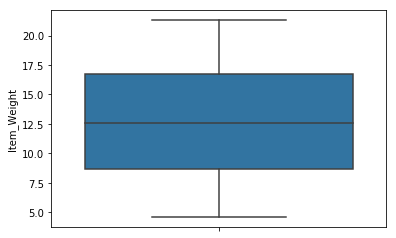

In [18]:
sns.boxplot(y = df["Item_Weight"])

#### Imputing missing values

In [19]:
df["Item_Weight"] = np.where(df["Item_Weight"].isnull(),
                             np.mean(df["Item_Weight"]),df["Item_Weight"])
df["Item_Weight"].isnull().sum()

0

In [20]:
df["Outlet_Size"].value_counts(dropna = False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [21]:
df["Outlet_Size"] = np.where(df["Outlet_Size"].isnull(),
                             "Unknown",df["Outlet_Size"])

In [22]:
df.isnull().sum()

Item_Fat_Content           0
Item_MRP                   0
Item_Outlet_Sales       5681
Item_Type                  0
Item_Visibility            0
Item_Weight                0
Outlet_Identifier          0
Outlet_Location_Type       0
Outlet_Size                0
Outlet_Type                0
data                       0
dtype: int64

In [23]:
df['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

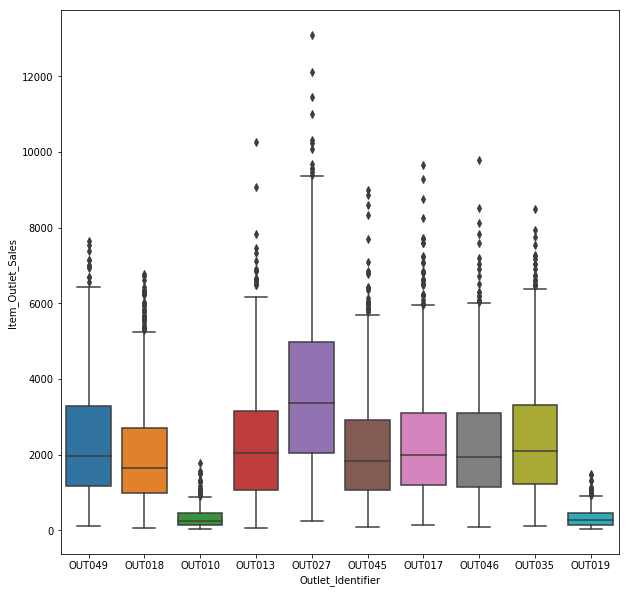

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(df['Outlet_Identifier'],df['Item_Outlet_Sales'])

In [25]:
# categorizing all outlets as High, medium and low sale outlets
# Make outlet 10 and 19 as low sale outlets
# make outlet 27 as high sale
# make all others as medium sale outlets

outlets=dict(df['Outlet_Identifier'].value_counts())
outlet_names=list(outlets.keys())

df['Outlet_Identifier']=np.where(df['Outlet_Identifier']==outlet_names[0],'High Sales',df['Outlet_Identifier'])


In [26]:
outlet_names.remove(outlet_names[0])
print(outlet_names)

['OUT013', 'OUT049', 'OUT046', 'OUT035', 'OUT045', 'OUT018', 'OUT017', 'OUT010', 'OUT019']


In [27]:
df['Outlet_Identifier']=np.where(df['Outlet_Identifier'].isin([outlet_names[7],outlet_names[8]]),'Low Sales',df['Outlet_Identifier'])

In [28]:
df['Outlet_Identifier'].value_counts()
outlet_names.remove(outlet_names[8])
outlet_names.remove(outlet_names[7])

In [29]:
print(outlet_names)

['OUT013', 'OUT049', 'OUT046', 'OUT035', 'OUT045', 'OUT018', 'OUT017']


In [30]:
df['Outlet_Identifier']=np.where(df['Outlet_Identifier'].isin(outlet_names),'Medium Sales',df['Outlet_Identifier'])

In [31]:
df['Outlet_Identifier'].value_counts()

Medium Sales    10840
Low Sales        1805
High Sales       1559
Name: Outlet_Identifier, dtype: int64

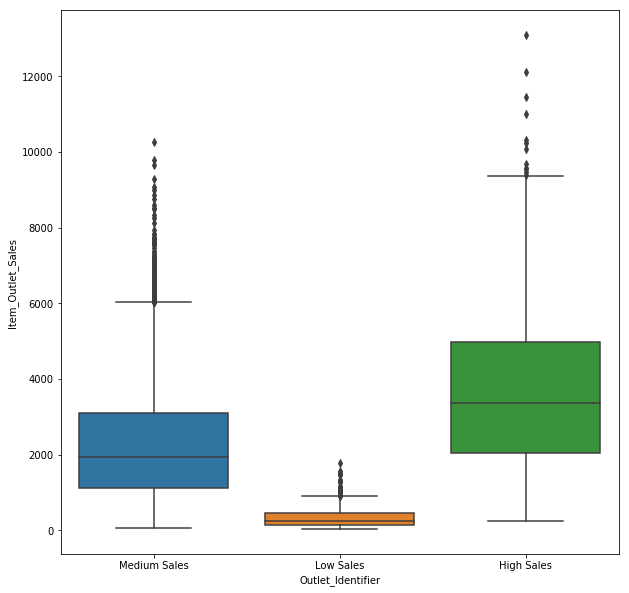

In [32]:
plt.figure(figsize=(10,10))
sns.boxplot(df['Outlet_Identifier'],df['Item_Outlet_Sales'])

In [33]:
cat_cols=df.select_dtypes('object').columns
cat_cols=cat_cols[:-1]
cat_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'],
      dtype='object')

In [34]:
pd.get_dummies(df,columns=cat_cols,prefix=cat_cols,drop_first=True).head()
#It converts categorical data into dummy or indicator variables.

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,data,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_Low Sales,Outlet_Identifier_Medium Sales,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,3735.1380,0.016047,9.30,train,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,48.2692,443.4228,0.019278,5.92,train,1,0,0,0,0,...,0,1,0,1,1,0,0,0,1,0
2,141.6180,2097.2700,0.016760,17.50,train,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,182.0950,732.3800,0.000000,19.20,train,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,53.8614,994.7052,0.000000,8.93,train,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [35]:
df=pd.get_dummies(df,columns=cat_cols,prefix=cat_cols,drop_first=True)

In [36]:
df

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,data,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_Low Sales,Outlet_Identifier_Medium Sales,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,3735.1380,0.016047,9.300000,train,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,48.2692,443.4228,0.019278,5.920000,train,1,0,0,0,0,...,0,1,0,1,1,0,0,0,1,0
2,141.6180,2097.2700,0.016760,17.500000,train,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,182.0950,732.3800,0.000000,19.200000,train,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,53.8614,994.7052,0.000000,8.930000,train,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
5,51.4008,556.6088,0.000000,10.395000,train,1,0,0,0,0,...,0,1,0,1,1,0,0,0,1,0
6,57.6588,343.5528,0.012741,13.650000,train,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
7,107.7622,4022.7636,0.127470,12.792854,train,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
8,96.9726,1076.5986,0.016687,16.200000,train,1,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
9,187.8214,4710.5350,0.094450,19.200000,train,1,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0


In [37]:
df.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,data,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_Low Sales,Outlet_Identifier_Medium Sales,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,3735.1380,0.016047,9.30,train,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,48.2692,443.4228,0.019278,5.92,train,1,0,0,0,0,...,0,1,0,1,1,0,0,0,1,0
2,141.6180,2097.2700,0.016760,17.50,train,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,182.0950,732.3800,0.000000,19.20,train,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,53.8614,994.7052,0.000000,8.93,train,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [38]:
train_df=df.loc[df['data']=='train']
test_df=df.loc[df['data']=='test']
#loc[] method is a method that takes only index labels and returns row or dataframe if the index label exists in the caller data frame.
train_df.shape,test_df.shape

((8523, 31), (5681, 31))

In [39]:
del train_df['data']
del test_df['data']

In [40]:
del test_df['Item_Outlet_Sales']


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [42]:
train_train,train_test=train_test_split(train_df,test_size=0.2)
train_test.shape

(1705, 30)

In [43]:
X=train_df.drop(['Item_Outlet_Sales'],axis=1)
Y=train_df['Item_Outlet_Sales']
x_train = train_train.drop(['Item_Outlet_Sales'],axis=1)
y_train=train_train['Item_Outlet_Sales']
x_test=train_test.drop(['Item_Outlet_Sales'],axis=1)
y_test=train_test['Item_Outlet_Sales']

In [44]:
lgr=LinearRegression(fit_intercept=True)   # constant value in the equation
lgr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
lgr.coef_
# gives all the Betas
#The beta coefficient is the degree of change in the outcome variable for every 1-unit of change in the predictor variable

array([ 1.57396459e+01, -1.13669044e+02, -1.01046398e-01,  5.09452047e+01,
       -7.58690982e+01,  1.24489538e+01, -4.21177926e+01, -9.98754280e+01,
       -1.04154842e+02, -2.14537754e+01, -4.74053541e+01, -2.35986971e+01,
       -1.05791389e+02, -4.57493661e+01, -9.28226514e+01,  1.33802888e+02,
       -7.52104534e+01, -7.45928691e+01,  5.90966282e+01, -1.58348936e+03,
        2.52924982e+01,  1.42454043e+02,  1.43105134e+02,  2.21291619e+02,
        1.01081948e+02, -5.09049714e+01,  3.07454262e+02, -2.82161764e+02,
        1.55819686e+03])

In [46]:
list(zip(x_train.columns,lgr.coef_))

[('Item_MRP', 15.739645933892843),
 ('Item_Visibility', -113.66904421859901),
 ('Item_Weight', -0.10104639845240548),
 ('Item_Fat_Content_Regular', 50.94520466083736),
 ('Item_Type_Breads', -75.8690981567193),
 ('Item_Type_Breakfast', 12.448953829031808),
 ('Item_Type_Canned', -42.11779255923648),
 ('Item_Type_Dairy', -99.87542802952879),
 ('Item_Type_Frozen Foods', -104.15484163317305),
 ('Item_Type_Fruits and Vegetables', -21.453775354247142),
 ('Item_Type_Hard Drinks', -47.405354122243764),
 ('Item_Type_Health and Hygiene', -23.59869707385515),
 ('Item_Type_Household', -105.79138927139722),
 ('Item_Type_Meat', -45.74936611385233),
 ('Item_Type_Others', -92.82265141678232),
 ('Item_Type_Seafood', 133.80288798714776),
 ('Item_Type_Snack Foods', -75.21045340067835),
 ('Item_Type_Soft Drinks', -74.59286905581992),
 ('Item_Type_Starchy Foods', 59.09662821573579),
 ('Outlet_Identifier_Low Sales', -1583.4893579644827),
 ('Outlet_Identifier_Medium Sales', 25.292498171470413),
 ('Outlet_Loca

In [47]:
p_test=lgr.predict(x_test)
p_test

array([1433.08420678, 2514.31503838, 4101.62905215, ...,  956.15477617,
       2403.4573627 ,  539.42489931])

In [48]:
results=pd.DataFrame({"Actual":y_test,"Predicted":p_test})
results.head()

,Actual,Predicted
4286,878.8560,1433.084207
6014,1264.3542,2514.315038
6787,4625.9784,4101.629052
7861,41.2796,-1250.619048
3551,2352.9372,940.812864


In [49]:
# evaluate with RMS now
# Root Mean Square Error is the square root of the average of the squared differences between the estimated and the actual value of the variable/feature.
rmsc=(mean_squared_error(y_test,p_test))**0.5
rmsc

1124.130867238869

In [50]:
lgr.fit(X,Y)
submission_df['Item_Outlet_Sales']=lgr.predict(test_df)
submission_df.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1835.825929
1,FDW14,OUT017,1444.934666
2,NCN55,OUT010,1879.344446
3,FDQ58,OUT017,2493.216060
4,FDY38,OUT027,5137.451627


In [1]:
#submission_df.to_csv("bhavika_Submission.csv",index=False)